<a href="https://colab.research.google.com/github/christine99x/MasterCourseProject/blob/main/SNA/SNA_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import csv
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms import community
from collections import Counter

3.1

In [ ]:
adjacendy_list = {}
edge_list = []
with open('twitter-small.tsv', encoding='utf-8') as f:
  tsvreader = csv.reader(f, delimiter='\t')
  for line in tsvreader:
    line[1] = line[1].lower()    #transfer to lower case
    adj = list(set(re.findall(r'@(\w+)', line[2].lower(), re.IGNORECASE)))    #get the mentioned user list
    if adj:    #if the mentioned list is not empty
      if line[1] not in adjacendy_list:     #for the first twitter of a user
        adjacendy_list[line[1]] = [adj,[1 for x in range(len(adj))], [line[0] for x in range(len(adj))]]
        # if line[1]=='stock_tweetz':
        #   print("timestamp: ",line[0])
        #   print("posting user: ",line[1])
        #   print("twitter: ",line[2])
      else:
        for i in adj:    #for an old link
          if i in adjacendy_list[line[1]][0]:
            ind = adjacendy_list[line[1]][0].index(i)
            adjacendy_list[line[1]][1][ind] += 1
          else:    #for a new link
            adjacendy_list[line[1]][0].append(i)
            adjacendy_list[line[1]][1].append(1)
            adjacendy_list[line[1]][2].append(line[0])
for i in adjacendy_list:    #transfer to edge list
    for j in range(len(adjacendy_list[i][0])):
        edge_list.append([i, adjacendy_list[i][0][j], adjacendy_list[i][1][j], adjacendy_list[i][2][j]])
edge_list = pd.DataFrame(edge_list)
edge_list = edge_list[edge_list[0]!=edge_list[1]]    #delete the data with the same sorce and target
print(edge_list)
# edge_list.to_csv('edges-larger.csv', index=False, header=False)
adjacendy_list = 0    #release memory

                    0               1  2                    3
0          cameron987   beatrizchavez  1  2009-06-11 16:56:59
1          cameron987  jeremyscheller  1  2009-06-11 20:32:15
2           kshepherd       arnoldkim  1  2009-06-11 16:58:32
3           kshepherd       blakespot  1  2009-06-11 16:58:32
4           kshepherd         bdudney  1  2009-06-11 23:16:20
...               ...             ... ..                  ...
68676       sales_man         mobiz24  1  2009-06-24 21:18:22
68677        t_mesiab         kmesiab  1  2009-06-24 21:18:23
68678  abelourjameson      stephenfry  1  2009-06-24 21:18:30
68679           iramo      parislemon  1  2009-06-24 21:18:49
68680           iramo      techcrunch  1  2009-06-24 21:18:49

[67481 rows x 4 columns]


3.2

In [ ]:
G = nx.DiGraph()
for i in range(edge_list.shape[0]):
  G.add_edge(edge_list.iat[i,0], edge_list.iat[i,1])
m = G.number_of_edges()
n = G.number_of_nodes()
print("m =", m)
print("n =", n)

m = 67481
n = 62820


In [ ]:
print("Strongly connected components: ", nx.number_strongly_connected_components(G))
print("Weakly connected components:", nx.number_weakly_connected_components(G))

Strongly connected components:  61952
Weakly connected components: 9914


In [ ]:
print("Density: ", m/(n*(n-1)))

Density:  2.821966464012992e-06


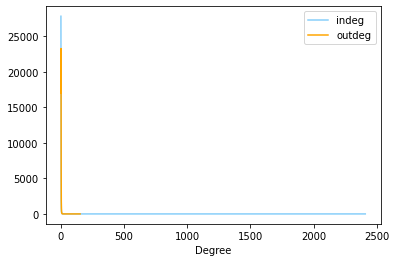

In [ ]:
indeg = []
outdeg = []
for i in G.in_degree:
  indeg.append(i[1])
for j in G.out_degree:
  outdeg.append(j[1])
indeg = Counter(indeg)
indeg = sorted(indeg.items())
outdeg = Counter(outdeg)
outdeg = sorted(outdeg.items())
x,y = zip(*indeg)
plt.plot(x,y, label='indeg', color='lightskyblue')
x,y = zip(*outdeg)
plt.plot(x,y, label='outdeg', color='orange')
# print(indeg)
plt.legend()
plt.xlabel("Degree")
plt.show()

In [ ]:
weak = max(list(nx.weakly_connected_components(G)), key=len)
weak = G.subgraph(weak).to_undirected()

In [ ]:
path = nx.all_pairs_shortest_path_length(weak)
counts = {}
for i in path:
  for j in i[1].values():
    if j in counts:
      counts[j] += 1
    else:
      counts[j] = 1
plt.xlabel("Distance")
plt.ylabel("Count")
plt.title("Distance Distribution")
plt.bar(counts.keys(),counts.values(), color='powderblue')
plt.savefig('dd.png')

KeyboardInterrupt: ignored

In [ ]:
print("Average clustering coefficient:", nx.average_clustering(G))

Average clustering coefficient: 0.028554329911848305


3.3

In [ ]:
d = sorted(nx.in_degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[:20]
d = set(map(lambda x: x[0], d))
e = sorted(nx.eigenvector_centrality(G).items(), key=lambda x:x[1], reverse=True)[:20]
e = set(map(lambda x: x[0], e))
c = sorted(nx.closeness_centrality(G).items(), key=lambda x:x[1], reverse=True)[:20]
c = set(map(lambda x: x[0], c))
print("similarity of d&c", len(d&c)/20)
print("similarity of e&c", len(e&c)/20)
print("similarity of d&e", len(d&e)/20)

similarity of d&c 0.4
similarity of e&c 0.15
similarity of d&e 0.2


In [ ]:
for x in e:
  print(x)
# print(d)
# print(b)
# print(c)

rogershelps
parislemon
kulpreetsingh
rogerskeith
copumpkin
dixontam
igncom
iphone_dev
iphoneincanada
anilparmar
gillianshaw
insaneabz
hardcoreware
johnchow
musclenerd
joshuadenney
evansrobert
iclarified
techcrunch
reneritchie


3.4

In [ ]:
index = []
for i in range(edge_list.shape[0]):
  if weak.has_edge(edge_list.iat[i,0], edge_list.iat[i,1]):
    index.append(list(edge_list.loc[edge_list.index[i],:].values))
c = pd.DataFrame(index)
c.columns = ['source','target','weight','timestamp']
c.to_csv('giant_component.csv', index=False)